> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Soccer Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [85]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
with sqlite3.connect('database.sqlite') as con:
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    countries_df = pd.read_sql_query("SELECT * from Country", con)
    matches_df = pd.read_sql_query("SELECT * from Match", con)
    leagues_df = pd.read_sql_query("SELECT * from League", con)
    teams_df = pd.read_sql_query("SELECT * from Team", con)
    players_df = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)
    

#### Dealing with Countries Data frame 

In [3]:
#check each file (has null values), 
#start with country 
print(countries_df)
print(countries_df.info())

       id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


##### as we see , No null value in all records so countries data frame , and no duplication , that mean , no need for cleaning here

#### Dealing with teams Data frame 

In [4]:
#check teams data frame 
teams_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


##### as we see , No null value in all records so team data frame , but team_fifa_api_id has 285 unique value from 299 , that mean we need to solve duplication in ids  attributes

### Research Question 2  (Replace this header name!)

#### Dealing with matches Data frame 

In [5]:
#check matches data frame
matches_df.info()
matches_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


id                  25979
country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
home_player_X1          3
home_player_X2          9
home_player_X3          8
home_player_X4          7
home_player_X5          9
home_player_X6          9
home_player_X7          9
home_player_X8          9
home_player_X9          9
home_player_X10         9
home_player_X11         6
away_player_X1          3
away_player_X2          8
away_player_X3          8
away_player_X4          8
away_player_X5          9
away_player_X6          9
away_player_X7          9
away_player_X8          9
                    ...  
B365H                 121
B365D                  72
B365A                 115
BWH                   237
BWD                   133
BWA                   261
IWH                   147
IWD         

In [6]:
most_missing_cols = set(matches_df.columns[matches_df.isnull().mean() > 0.50])

In [7]:
most_missing_cols 

{'PSA', 'PSD', 'PSH'}

##### as we see 'PSA', 'PSD', 'PSH' attributes have more than 50% missing vlaues so we need to drop it, in cleaning , all attributes dont have duplication so it s ok with duplication, also there are alot of attributtes we won't be helpful with our anlaysis so we can drop it , beacause this data frame have 115 attribute(which it is huage number can't be useful)


#### Dealing with Countries Data frame 

In [8]:
#check Leagues data frame

leagues_df.info()
leagues_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


id            11
country_id    11
name          11
dtype: int64

In [9]:
leagues_df.head(10)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


##### as we see , No null value in all records so Leagues data frame , and no duplication , that mean , no need for cleaning here

#### Dealing with players Data frame 

In [10]:
#check players data frame
players_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [11]:
players_df.nunique()

id                    11060
player_api_id         11060
player_name           10848
player_fifa_api_id    11060
birthday               5762
height                   20
weight                   50
dtype: int64

##### as we see , No null value in all records so players data frame , and no duplication in id attribute , that mean , no need for cleaning here


#### Dealing with player_attributes Data frame 

In [12]:
#check player attributes data frame
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [13]:
#check team attributes data frame
player_attributes.nunique()


id                     183978
player_fifa_api_id      11062
player_api_id           11060
date                      197
overall_rating             61
potential                  56
preferred_foot              2
attacking_work_rate         8
defensive_work_rate        19
crossing                   95
finishing                  97
heading_accuracy           96
short_passing              95
volleys                    93
dribbling                  97
curve                      92
free_kick_accuracy         97
long_passing               95
ball_control               93
acceleration               86
sprint_speed               85
agility                    81
reactions                  78
balance                    81
shot_power                 96
jumping                    79
stamina                    84
strength                   82
long_shots                 96
aggression                 91
interceptions              96
positioning                95
vision                     97
penalties 

##### as we see there are three catigorical attributes have missing values so we need to replace null with mode value  ,as we see there are three numerical attributes have missing values so we need to replace null with mean value, and no duplication , we need change something here in cleaning.


#### Dealing with teams  attributes Data frame 

In [14]:
#check team attributes data frame
team_attributes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [15]:
team_attributes.nunique()


id                                1458
team_fifa_api_id                   285
team_api_id                        288
date                                 6
buildUpPlaySpeed                    57
buildUpPlaySpeedClass                3
buildUpPlayDribbling                49
buildUpPlayDribblingClass            3
buildUpPlayPassing                  58
buildUpPlayPassingClass              3
buildUpPlayPositioningClass          2
chanceCreationPassing               50
chanceCreationPassingClass           3
chanceCreationCrossing              56
chanceCreationCrossingClass          3
chanceCreationShooting              57
chanceCreationShootingClass          3
chanceCreationPositioningClass       2
defencePressure                     48
defencePressureClass                 3
defenceAggression                   47
defenceAggressionClass               3
defenceTeamWidth                    43
defenceTeamWidthClass                3
defenceDefenderLineClass             2
dtype: int64

In [16]:
#check team attributes data frame
team_attributes.nunique()


id                                1458
team_fifa_api_id                   285
team_api_id                        288
date                                 6
buildUpPlaySpeed                    57
buildUpPlaySpeedClass                3
buildUpPlayDribbling                49
buildUpPlayDribblingClass            3
buildUpPlayPassing                  58
buildUpPlayPassingClass              3
buildUpPlayPositioningClass          2
chanceCreationPassing               50
chanceCreationPassingClass           3
chanceCreationCrossing              56
chanceCreationCrossingClass          3
chanceCreationShooting              57
chanceCreationShootingClass          3
chanceCreationPositioningClass       2
defencePressure                     48
defencePressureClass                 3
defenceAggression                   47
defenceAggressionClass               3
defenceTeamWidth                    43
defenceTeamWidthClass                3
defenceDefenderLineClass             2
dtype: int64

##### as we see buildUpPlayDribbling attribute have more than 50% missing vlaues so we need to drop it, in cleaning , all attributes dont have duplication so it s ok with duplication, 


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

#### now after going deep in data set we will clean data ,, there are data frames have problem we will clean it.

##### Team data frame we will drop buildUpPlayDribbling 


In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
team_attributes.drop(['buildUpPlayDribbling'],axis=1,inplace=True)

#### players_attributes replace missing value with mode for catigorical and mean for numerical


In [18]:
player_attributes.fillna(player_attributes.mean(), inplace=True)


In [19]:
player_attributes.fillna(player_attributes.mode().iloc[0], inplace=True)


In [20]:
#check
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183978 non-null float64
potential              183978 non-null float64
preferred_foot         183978 non-null object
attacking_work_rate    183978 non-null object
defensive_work_rate    183978 non-null object
crossing               183978 non-null float64
finishing              183978 non-null float64
heading_accuracy       183978 non-null float64
short_passing          183978 non-null float64
volleys                183978 non-null float64
dribbling              183978 non-null float64
curve                  183978 non-null float64
free_kick_accuracy     183978 non-null float64
long_passing           183978 non-null float64
ball_control           183978 non-null float64
accele

#### In matches data frame :: 'PSA', 'PSD', 'PSH' attributes have more than 50% missing vlaues so we need to drop it, in cleaning , all attributes dont have duplication so it s ok with duplication, also there are alot of attributtes we won't be helpful with our anlaysis so we can drop it , beacause this data frame have 115 attribute(which it is huage number can't be useful)


In [21]:
matches_df.drop(['PSA', 'PSD', 'PSH'],axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### Question 1 :who highest players rating ?

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

overall_rating= player_attributes.groupby(['player_api_id'])['overall_rating'].agg('mean')

In [24]:
overall_rating.idxmax()

30981

In [25]:
print(players_df["player_name"].loc[players_df['player_api_id']==overall_rating.idxmax()])

6169    Lionel Messi
Name: player_name, dtype: object


##### messi has best rating 


### Question 2 : which league have largest number of goals?

In [26]:
def total_goal(df):
    return df["home_team_goal"] + df["away_team_goal"]
matches_df["total_goals"]=matches_df.apply(total_goal,axis=1)
#matches_df["total_goals"]
#matches_df.groupby(['league_id','total_goals']).sum()
sum_goal_per_league=matches_df.groupby(['league_id'])['total_goals'].agg('sum')

In [27]:
sum_goal_per_league.idxmax()

21518

In [28]:
print(leagues_df.loc[leagues_df['id']==sum_goal_per_league.idxmax()])

      id  country_id             name
9  21518       21518  Spain LIGA BBVA


##### highest goal scoring league is Spain LIGA BBVA 

### Question 3 : which team has largest win ratio ?

In [29]:
#first we make attribute represent matct outcome from goal of team
def match_outcome(df):
    if (df["home_team_goal"] > df["away_team_goal"]):
        
        return "home team win"
    elif (df["home_team_goal"] == df["away_team_goal"]):
        return "draw"
    else:
        return "away team win"
matches_df['match_outcome']=matches_df.apply(match_outcome,axis=1)
matches_df['match_outcome']


0                 draw
1                 draw
2        away team win
3        home team win
4        away team win
5                 draw
6                 draw
7        away team win
8        home team win
9        home team win
10       away team win
11       away team win
12                draw
13                draw
14       away team win
15       away team win
16       away team win
17       away team win
18       away team win
19                draw
20                draw
21       home team win
22                draw
23       away team win
24                draw
25       home team win
26       away team win
27                draw
28                draw
29                draw
             ...      
25949    home team win
25950    away team win
25951    away team win
25952             draw
25953    home team win
25954    home team win
25955    away team win
25956    away team win
25957    home team win
25958             draw
25959    away team win
25960    away team win
25961    aw

In [30]:
filter = matches_df["match_outcome"]=="home team win"
selected= matches_df.loc[filter]
selected.shape

(11917, 114)

In [31]:
filter = matches_df["match_outcome"]=="away team win"
selected_away= matches_df.loc[filter]


In [32]:
#print(selected.groupby(["home_team_api_id"]).max())
home_wins_count=selected["home_team_api_id"].value_counts()
print(home_wins_count)

8634      131
8633      129
9925      120
10260     116
8456      113
9823      109
8640      105
9885      105
9931      103
8593      103
9906      103
9772      102
9773      102
9847      102
8455      101
9825       97
8686       97
9875       95
8639       93
8564       92
9748       91
8302       91
8636       90
10267      90
9789       88
8586       88
8650       86
10235      86
8611       85
10192      85
         ... 
8194        5
6391        5
7947        5
8678        5
177361      5
8295        5
9776        5
8344        5
8483        5
8460        4
4170        4
8152        4
8479        4
9798        4
9878        4
9765        4
6269        4
9746        4
6547        3
8690        3
6631        3
188163      3
6351        3
7992        3
4064        3
108893      2
8262        2
9912        2
8457        1
7869        1
Name: home_team_api_id, Length: 298, dtype: int64


In [33]:
#print(selected.groupby(["home_team_api_id"]).max())
away_wins_count=selected_away["away_team_api_id"].value_counts()
print(away_wins_count)

8634      103
8633       99
9925       98
9823       84
9885       84
9772       83
9773       81
8593       78
9931       77
10260      76
8455       75
8640       73
9825       73
9847       73
9789       69
9768       65
8686       65
8650       64
9906       64
8636       64
8586       63
8592       63
8456       62
8564       62
9748       62
8178       61
8611       59
10243      58
9875       58
10229      58
         ... 
9996        3
7896        3
9765        2
9891        2
6269        2
8398        2
8344        2
9912        2
6351        2
9868        2
7869        2
8549        2
10278       2
8194        2
7992        2
6547        2
4064        2
9798        2
9878        2
6601        1
6631        1
4049        1
10213       1
8550        1
9867        1
108893      1
8388        1
6367        1
9858        1
9776        1
Name: away_team_api_id, Length: 299, dtype: int64


In [34]:
total=home_wins_count + away_wins_count

In [53]:
(total.idxmax())
total.sort_values(ascending=False)


8634      234.0
8633      228.0
9925      218.0
9823      193.0
10260     192.0
9885      189.0
9772      185.0
9773      183.0
8593      181.0
9931      180.0
8640      178.0
8455      176.0
8456      175.0
9847      175.0
9825      170.0
9906      167.0
8686      162.0
9789      157.0
8564      154.0
8636      154.0
9875      153.0
9748      153.0
8586      151.0
8650      150.0
8639      147.0
8611      144.0
9768      144.0
8592      143.0
10267     142.0
10192     142.0
          ...  
10213       8.0
8479        8.0
6391        8.0
8344        7.0
6367        7.0
4170        7.0
4049        7.0
8549        7.0
8550        7.0
8194        7.0
6601        7.0
9746        7.0
9858        7.0
8460        7.0
8690        6.0
9765        6.0
9878        6.0
9798        6.0
9776        6.0
6269        6.0
6547        5.0
6351        5.0
8457        5.0
7992        5.0
4064        5.0
9912        4.0
6631        4.0
7869        3.0
108893      3.0
8357        NaN
Length: 299, dtype: floa

In [54]:
print(teams_df["team_long_name"].loc[teams_df['team_api_id']==total.idxmax()])

258    FC Barcelona
Name: team_long_name, dtype: object


In [73]:
highest_five_teams = total.nlargest(5)
highest_five_teams=highest_five_teams.to_frame(name='number_matches')
index_teams=highest_five_teams.index


In [74]:
highest_five_teams["id"]=index_teams

In [75]:
highest_five_teams.head()

,number_matches,id
8634,234.0,8634
8633,228.0,8633
9925,218.0,9925
9823,193.0,9823
10260,192.0,10260


In [76]:
mask = teams_df['team_api_id'].isin([8634,8633,9925,9823,10260])

In [77]:
filtered_teams=teams_df.loc[mask]

In [83]:
filtered_teams=filtered_teams.join(highest_five_teams.set_index('id'), on='team_api_id')

In [96]:
filtered_teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,number_matches
25,3457,10260,11.0,Manchester United,MUN,192.0
94,15617,9823,21.0,FC Bayern Munich,BMU,193.0
242,39395,9925,78.0,Celtic,CEL,218.0
256,43040,8633,243.0,Real Madrid CF,REA,228.0
258,43042,8634,241.0,FC Barcelona,BAR,234.0


(80, 300)

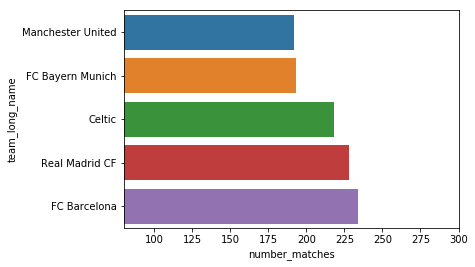

In [95]:
sns.barplot(y="team_long_name", x="number_matches",data=filtered_teams)
plt.xlim(80,300)

#### now we add new aatribute (outcome match) repressent which team win home or away or draw, then filter data frame for which team win in homa and away and get max in this two list so we will founc barcelona (8634) have best ratio (131 home win) and 103 away win , then real madrid(8633), cletic and FC bayern munich and manchester utd.

### Question 4: What are the attributes that contribute to the players' overall rating? ?  

In [120]:
player_attributes_new=player_attributes[["overall_rating","heading_accuracy","free_kick_accuracy",'ball_control','sprint_speed','long_shots','shot_power','marking','dribbling','strength']]

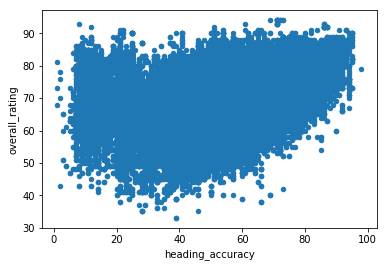

In [116]:
#relationship between rating and heading accuracy
player_attributes.plot(x='heading_accuracy', y='overall_rating', kind='scatter');

There is a positive correlation between heading accuracy and overall rating.

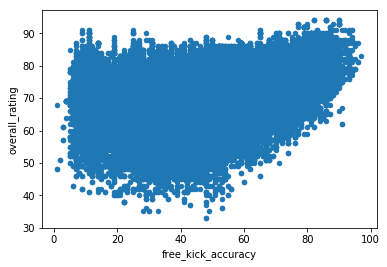

In [117]:
#relationship between rating and free kick accuracy
player_attributes.plot(x='free_kick_accuracy', y='overall_rating', kind='scatter')

Free kick accuracy have a strong impact in overall rating.

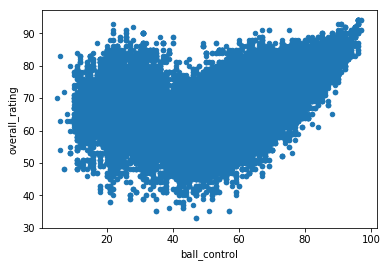

In [124]:
#relationship between rating and ball control
player_attributes.plot(x='ball_control', y='overall_rating', kind='scatter');

There is a strong positive correlation between overall rating and ball control.

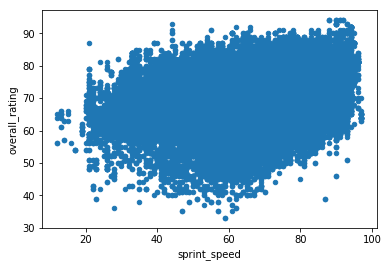

In [125]:
#relationship between rating and sprint speed
player_attributes.plot(x='sprint_speed', y='overall_rating', kind='scatter');

positive correlation between overall rating and sprint speed.

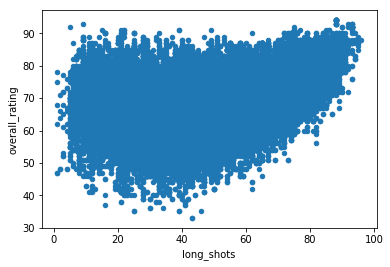

In [126]:

player_attributes.plot(x='long_shots', y='overall_rating', kind='scatter');

Positive correlation between long shots and overall rating.

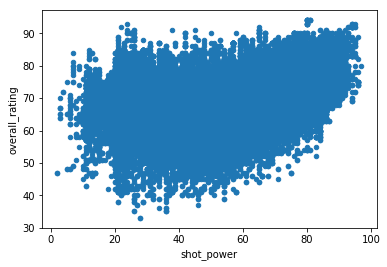

In [127]:
player_attributes.plot(x='shot_power', y='overall_rating', kind='scatter');

Strong correlation between shot power and overall rating.

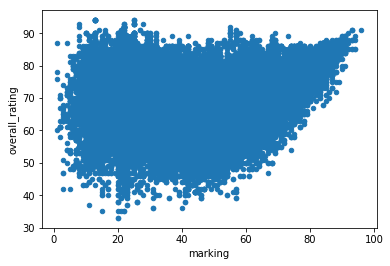

In [128]:
player_attributes.plot(x='marking', y='overall_rating', kind='scatter');


We can't say there is a positive correlation between marking and overall rating.

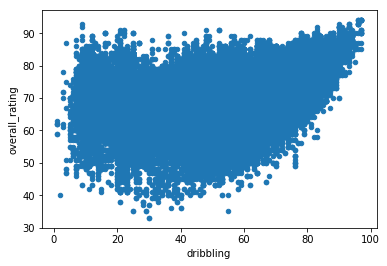

In [129]:
player_attributes.plot(x='dribbling', y='overall_rating', kind='scatter');


positive correlation between overall rating and dribbling.

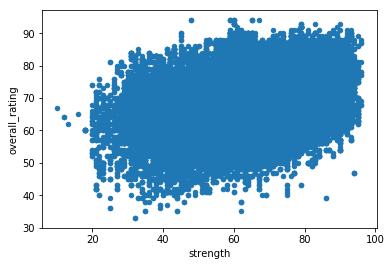

In [130]:
#relationship between rating and strength
player_attributes.plot(x='strength', y='overall_rating', kind='scatter');

Strong positive correlation between strength and overall rating.

##### we can check dependedcies using pearson's method to get correlation matrx to check which attributte have strong relation with overall rating

In [131]:
corr_matrix = player_attributes_new.corr() 
corr_matrix["overall_rating"].sort_values(ascending=False)

overall_rating        1.000000
ball_control          0.444257
shot_power            0.427996
long_shots            0.392382
dribbling             0.354324
free_kick_accuracy    0.349592
strength              0.318661
heading_accuracy      0.314099
sprint_speed          0.254841
marking               0.133377
Name: overall_rating, dtype: float64

##### as we see all attributes have strong relation with overall rating but marking has lowest number and the same we see in scatter plot

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

### Conclusion:

##### 1- i found FC Barcelona have best winning record with (131 home win) and (103 away win)
##### 2- highest league in goal scoring Spain LIGA BBVA
##### 3 best rated player lionel messi
##### 4- ball control the most attribute that contribute to player's overall rating and all skills like long shots and ... have good contribution but marking have lower postive correlation

### Limitations:
##### 1- many columns has alot of null values and thats make me drop it beacuse we can't make analysis.
##### 2-there ara unuseful attributes in match date frame like PSV and some values like that.
##### 3-there ara attributes describe goals in match data frame , it cant be useful to make anaysis to describe goal type from it , it written in xml 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])